# Reading Regression Timing Data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('regression_timings master list.csv')
df

,Test Name,MyISAM Total Time,MyISAM Start Transfer Time,Unnamed: 3,InnoDB Total Time,InnoDB Start Transfer Time
0,Cloud/configuration/cloud_avg_cores_reserved/a...,0.059955,0.059950,NaN,0.056255,0.056252
1,Cloud/configuration/cloud_avg_cores_reserved/a...,0.065416,0.065412,NaN,0.061219,0.061216
2,Cloud/configuration/cloud_avg_cores_reserved/a...,0.072476,0.072471,NaN,0.065990,0.065987
3,Cloud/configuration/cloud_avg_cores_reserved/a...,0.063708,0.063705,NaN,0.056681,0.056678
4,Cloud/configuration/cloud_avg_cores_reserved/a...,0.064494,0.064490,NaN,0.062833,0.062812
...,...,...,...,...,...,...
24395,Storage/username/user_count/timeseries-Year-cd,0.496918,0.492954,NaN,0.244348,0.240255
24396,Storage/username/user_count/timeseries-Year-cs,0.495570,0.490856,NaN,0.261630,0.256816
24397,Storage/username/user_count/timeseries-Year-pi,0.068550,0.068547,NaN,0.062513,0.062508
24398,Storage/username/user_count/timeseries-Year-pu...,0.045511,0.045504,NaN,0.048143,0.048140


# Charting Total and Transfer Times

MyISAM Total Time             8013.868693
MyISAM Start Transfer Time    8004.468570
InnoDB Total Time             4517.444272
InnoDB Start Transfer Time    4508.897521
dtype: float64


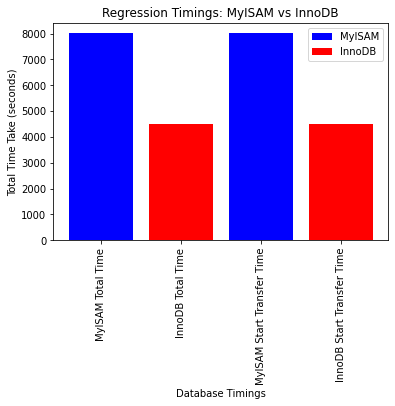

In [36]:
#df.sum() #sums all cols by default
cols_to_sum = ['MyISAM Total Time','MyISAM Start Transfer Time','InnoDB Total Time','InnoDB Start Transfer Time']
total_time = df[cols_to_sum].sum()
print(total_time)
plt.title("Regression Timings: MyISAM vs InnoDB")
#plt.bar(cols_to_sum, total_time)
plt.bar(cols_to_sum[0], total_time[0], color='blue', label='MyISAM')
plt.bar(cols_to_sum[2], total_time[2], color='red', label='InnoDB')
plt.bar(cols_to_sum[1], total_time[1], color='blue')
plt.bar(cols_to_sum[3], total_time[3], color='red')
plt.xticks(rotation=90) #rotate lables vertically
plt.xlabel('Database Timings')
plt.ylabel('Total Time Take (seconds)')
plt.legend()
plt.show()

# Modifying Dataframe

## Deleting & Inserting Additional Columns

In [37]:
del df['Unnamed: 3'] #Get rid of blank column, no need to rerun this whole block (errors)
test = df['Test Name'].str.split('/', expand=True)
l = test[3].str.split('-', expand=True)

df.insert(1, 'Realm', test[0])
df.insert(2, 'Group By', test[1])
df.insert(3, 'Statistic', test[2])
df.insert(4, 'Data Set Type', l[0])
df.insert(5, 'Aggregation Unit', l[1])
df

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time
0,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.059955,0.059950,0.056255,0.056252
1,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.065416,0.065412,0.061219,0.061216
2,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.072476,0.072471,0.065990,0.065987
3,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.063708,0.063705,0.056681,0.056678
4,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.064494,0.064490,0.062833,0.062812
...,...,...,...,...,...,...,...,...,...,...
24395,Storage/username/user_count/timeseries-Year-cd,Storage,username,user_count,timeseries,Year,0.496918,0.492954,0.244348,0.240255
24396,Storage/username/user_count/timeseries-Year-cs,Storage,username,user_count,timeseries,Year,0.495570,0.490856,0.261630,0.256816
24397,Storage/username/user_count/timeseries-Year-pi,Storage,username,user_count,timeseries,Year,0.068550,0.068547,0.062513,0.062508
24398,Storage/username/user_count/timeseries-Year-pu...,Storage,username,user_count,timeseries,Year,0.045511,0.045504,0.048143,0.048140


# Further Analysis

## Calculating Percentages Into A New Dataframe

In [38]:
percent_change = (100 * (df['InnoDB Total Time'] - df['MyISAM Total Time']) / df['MyISAM Total Time'].abs())
df.insert(10, 'Percent Change', percent_changed)
df

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time,Percent Change
0,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.059955,0.059950,0.056255,0.056252,-6.171295
1,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.065416,0.065412,0.061219,0.061216,-6.415862
2,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.072476,0.072471,0.065990,0.065987,-8.949169
3,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.063708,0.063705,0.056681,0.056678,-11.030012
4,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.064494,0.064490,0.062833,0.062812,-2.575433
...,...,...,...,...,...,...,...,...,...,...,...
24395,Storage/username/user_count/timeseries-Year-cd,Storage,username,user_count,timeseries,Year,0.496918,0.492954,0.244348,0.240255,-50.827299
24396,Storage/username/user_count/timeseries-Year-cs,Storage,username,user_count,timeseries,Year,0.495570,0.490856,0.261630,0.256816,-47.206247
24397,Storage/username/user_count/timeseries-Year-pi,Storage,username,user_count,timeseries,Year,0.068550,0.068547,0.062513,0.062508,-8.806710
24398,Storage/username/user_count/timeseries-Year-pu...,Storage,username,user_count,timeseries,Year,0.045511,0.045504,0.048143,0.048140,5.783217


## Scatter Plotting

<AxesSubplot:ylabel='Percent Change'>

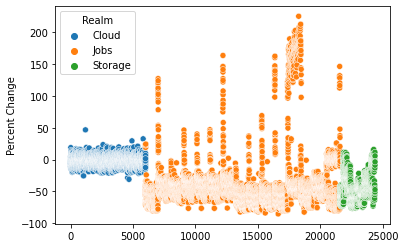

In [39]:
sns.scatterplot(x=df.index, y=df['Percent Change'], hue=df['Realm'])

<AxesSubplot:ylabel='Percent Change'>

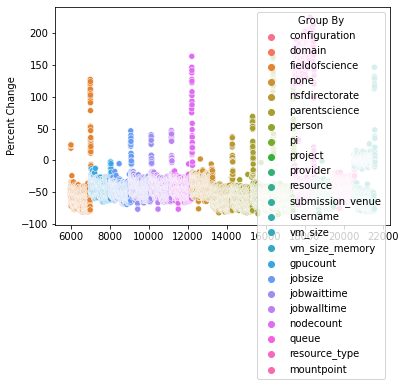

In [47]:
jobs_df = df.loc[df['Realm'] == 'Jobs']
sns.scatterplot(x=df.index, y=jobs_df['Percent Change'], hue=df['Group By'])

In [50]:
jobs_df.groupby('Group By')
jobs_df

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time,Percent Change
6000,Jobs/fieldofscience/active_person_count/aggreg...,Jobs,fieldofscience,active_person_count,aggregate,Day,0.165117,0.165113,0.072824,0.072821,-55.895517
6001,Jobs/fieldofscience/active_person_count/aggreg...,Jobs,fieldofscience,active_person_count,aggregate,Day,0.161540,0.161537,0.079492,0.079488,-50.791135
6002,Jobs/fieldofscience/active_person_count/aggreg...,Jobs,fieldofscience,active_person_count,aggregate,Day,0.157145,0.157141,0.084000,0.083995,-46.546183
6003,Jobs/fieldofscience/active_person_count/aggreg...,Jobs,fieldofscience,active_person_count,aggregate,Day,0.157126,0.157121,0.090336,0.090330,-42.507287
6004,Jobs/fieldofscience/active_person_count/aggreg...,Jobs,fieldofscience,active_person_count,aggregate,Day,0.177173,0.177165,0.079150,0.079147,-55.326150
...,...,...,...,...,...,...,...,...,...,...,...
21595,Jobs/username/utilization/timeseries-Year-cd,Jobs,username,utilization,timeseries,Year,14.463392,14.460533,15.746083,15.740553,8.868535
21596,Jobs/username/utilization/timeseries-Year-cs,Jobs,username,utilization,timeseries,Year,15.142038,15.137937,15.621214,15.616744,3.164541
21597,Jobs/username/utilization/timeseries-Year-pi,Jobs,username,utilization,timeseries,Year,0.073674,0.073670,0.068740,0.068736,-6.697071
21598,Jobs/username/utilization/timeseries-Year-public,Jobs,username,utilization,timeseries,Year,0.047225,0.047220,0.046344,0.046341,-1.865537


## Top 5 Lowest & Highest Values

### Top 5 Fastest Tests For MyISAM Total Time

In [53]:
perc_df.sort_values(by=['MyISAM Total Time']).head(5)

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time
24278,Storage/username/avg_logical_utilization/times...,Storage,username,avg_logical_utilization,timeseries,Year,0.0005,0.0005,0.0010,0.0010
20633,Jobs/username/active_pi_count/timeseries-Quart...,Jobs,username,active_pi_count,timeseries,Quarter,0.0005,0.0005,0.0011,0.0011
20638,Jobs/username/active_pi_count/timeseries-Year-...,Jobs,username,active_pi_count,timeseries,Year,0.0005,0.0005,0.0010,0.0010
24288,Storage/username/avg_physical_usage/aggregate-...,Storage,username,avg_physical_usage,aggregate,Month,0.0005,0.0005,0.0010,0.0010
5193,Cloud/username/cloud_wall_time/timeseries-Quar...,Cloud,username,cloud_wall_time,timeseries,Quarter,0.0005,0.0005,0.0010,0.0010


### Top 5 Fastest Tests MyISAM Start Transfer Time

In [48]:
perc_df.sort_values(by=['MyISAM Start Transfer Time']).head(5)

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time
20648,Jobs/username/active_resource_count/aggregate-...,Jobs,username,active_resource_count,aggregate,Month,0.0005,0.0005,0.0011,0.0011
5073,Cloud/username/cloud_num_sessions_ended/timese...,Cloud,username,cloud_num_sessions_ended,timeseries,Quarter,0.0005,0.0005,0.0010,0.0010
24278,Storage/username/avg_logical_utilization/times...,Storage,username,avg_logical_utilization,timeseries,Year,0.0005,0.0005,0.0010,0.0010
20653,Jobs/username/active_resource_count/aggregate-...,Jobs,username,active_resource_count,aggregate,Quarter,0.0005,0.0005,0.0011,0.0011
5058,Cloud/username/cloud_num_sessions_ended/aggreg...,Cloud,username,cloud_num_sessions_ended,aggregate,Year,0.0005,0.0005,0.0010,0.0010


### Top 5 Fastest Tests For InnoDB Total Time

In [50]:
perc_df.sort_values(by=['InnoDB Total Time']).head(5)

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time
24293,Storage/username/avg_physical_usage/aggregate-...,Storage,username,avg_physical_usage,aggregate,Quarter,0.0006,0.0006,0.0009,0.0009
4868,Cloud/username/cloud_avg_memory_reserved/times...,Cloud,username,cloud_avg_memory_reserved,timeseries,Month,0.0006,0.0006,0.0009,0.0009
4863,Cloud/username/cloud_avg_memory_reserved/times...,Cloud,username,cloud_avg_memory_reserved,timeseries,Day,0.0006,0.0006,0.0009,0.0010
24323,Storage/username/avg_soft_threshold/aggregate-...,Storage,username,avg_soft_threshold,aggregate,Day,0.0006,0.0006,0.0009,0.0009
20798,Jobs/username/avg_gpus/timeseries-Year-public,Jobs,username,avg_gpus,timeseries,Year,0.0006,0.0006,0.0009,0.0009


### Top 5 Fastest Tests For InnoDB Start Transfer Time

In [51]:
perc_df.sort_values(by=['InnoDB Start Transfer Time']).head(5)

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time
4948,Cloud/username/cloud_avg_wallduration_hours/ti...,Cloud,username,cloud_avg_wallduration_hours,timeseries,Month,0.0006,0.0006,0.0009,0.0009
24293,Storage/username/avg_physical_usage/aggregate-...,Storage,username,avg_physical_usage,aggregate,Quarter,0.0006,0.0006,0.0009,0.0009
20798,Jobs/username/avg_gpus/timeseries-Year-public,Jobs,username,avg_gpus,timeseries,Year,0.0006,0.0006,0.0009,0.0009
4868,Cloud/username/cloud_avg_memory_reserved/times...,Cloud,username,cloud_avg_memory_reserved,timeseries,Month,0.0006,0.0006,0.0009,0.0009
24323,Storage/username/avg_soft_threshold/aggregate-...,Storage,username,avg_soft_threshold,aggregate,Day,0.0006,0.0006,0.0009,0.0009


### Top 5 Lowest Tests For MyISAM Total Time

In [54]:
perc_df.sort_values(by=['MyISAM Total Time'], ascending=False).head(5)

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time
21596,Jobs/username/utilization/timeseries-Year-cs,Jobs,username,utilization,timeseries,Year,0.1889,0.1891,0.3458,0.3464
21595,Jobs/username/utilization/timeseries-Year-cd,Jobs,username,utilization,timeseries,Year,0.1805,0.1807,0.3486,0.3491
16396,Jobs/person/utilization/timeseries-Year-cs,Jobs,person,utilization,timeseries,Year,0.1792,0.1793,0.3437,0.3443
16397,Jobs/person/utilization/timeseries-Year-pi,Jobs,person,utilization,timeseries,Year,0.1774,0.1775,0.3428,0.3433
16399,Jobs/person/utilization/timeseries-Year-usr,Jobs,person,utilization,timeseries,Year,0.1770,0.1771,0.3475,0.3481


### Top 5 Fastest Tests For MyISAM Start Transfer Time

In [55]:
perc_df.sort_values(by=['MyISAM Start Transfer Time'], ascending=False).head(5)

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time
21596,Jobs/username/utilization/timeseries-Year-cs,Jobs,username,utilization,timeseries,Year,0.1889,0.1891,0.3458,0.3464
21595,Jobs/username/utilization/timeseries-Year-cd,Jobs,username,utilization,timeseries,Year,0.1805,0.1807,0.3486,0.3491
16396,Jobs/person/utilization/timeseries-Year-cs,Jobs,person,utilization,timeseries,Year,0.1792,0.1793,0.3437,0.3443
16397,Jobs/person/utilization/timeseries-Year-pi,Jobs,person,utilization,timeseries,Year,0.1774,0.1775,0.3428,0.3433
16399,Jobs/person/utilization/timeseries-Year-usr,Jobs,person,utilization,timeseries,Year,0.1770,0.1771,0.3475,0.3481


### Top 5 Fastest Tests For InnoDB Total Time

In [56]:
perc_df.sort_values(by=['InnoDB Total Time'], ascending=False).head(5)

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time
16398,Jobs/person/utilization/timeseries-Year-public,Jobs,person,utilization,timeseries,Year,0.1769,0.1771,0.3568,0.3574
21595,Jobs/username/utilization/timeseries-Year-cd,Jobs,username,utilization,timeseries,Year,0.1805,0.1807,0.3486,0.3491
16399,Jobs/person/utilization/timeseries-Year-usr,Jobs,person,utilization,timeseries,Year,0.1770,0.1771,0.3475,0.3481
21596,Jobs/username/utilization/timeseries-Year-cs,Jobs,username,utilization,timeseries,Year,0.1889,0.1891,0.3458,0.3464
16395,Jobs/person/utilization/timeseries-Year-cd,Jobs,person,utilization,timeseries,Year,0.1728,0.1729,0.3451,0.3456


### Top 5 Fastest Tests For InnoDB Start Transfer Time

In [57]:
perc_df.sort_values(by=['InnoDB Start Transfer Time'], ascending=False).head(5)

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time
16398,Jobs/person/utilization/timeseries-Year-public,Jobs,person,utilization,timeseries,Year,0.1769,0.1771,0.3568,0.3574
21595,Jobs/username/utilization/timeseries-Year-cd,Jobs,username,utilization,timeseries,Year,0.1805,0.1807,0.3486,0.3491
16399,Jobs/person/utilization/timeseries-Year-usr,Jobs,person,utilization,timeseries,Year,0.1770,0.1771,0.3475,0.3481
21596,Jobs/username/utilization/timeseries-Year-cs,Jobs,username,utilization,timeseries,Year,0.1889,0.1891,0.3458,0.3464
16395,Jobs/person/utilization/timeseries-Year-cd,Jobs,person,utilization,timeseries,Year,0.1728,0.1729,0.3451,0.3456


# Writing Out Dataframes To Local Files

In [22]:
df.to_csv('new_regression_timings.csv', index=False) #index=False avoids seperate column of indexes